In [412]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
os.chdir('/Users/ItelinaMa/Documents/Metis/McNulty/trainingSet')

In [413]:
df = pd.read_csv('visualization.csv')

In [414]:
df.head(5)

,Unnamed: 0,index,DiagnosisDescription,PercentageDiab,PatientsWithCondition,PercentageOfTotalPop
0,0,002.0,Typhoid fever,1.0,1,0.000101
1,1,003.0,Salmonella gastroenteritis,0.5,2,0.000201
2,2,003.23,Salmonella arthritis,0.0,1,0.000101
3,3,005.9,"Food poisoning, unspecified",0.0,4,0.000402
4,4,007.1,Giardiasis,0.0,4,0.000402


In [415]:
df.columns = ['x', 'ICD9','ICD9Descrp', 'PercentageDiab', 'PatientsWithCondition','PercentageOfTotalPop']
df1 = df[['ICD9', 'ICD9Descrp', 'PercentageOfTotalPop', 'PercentageDiab']].copy()
df1 = df1[df1['PercentageOfTotalPop'] > 0.0015]
df1['name'] = df1.ICD9Descrp + " (" + df.ICD9 + ")"

In [416]:
ndf = df1[['name', 'PercentageDiab', 'PercentageOfTotalPop']].copy()
ndf['Size'] = ndf['PercentageOfTotalPop']*10000
ndf['Bins'] = pd.cut(ndf['PercentageDiab'], 4, labels=['Low',"MediumLow","Medium","High"])
ndf = ndf.sort('PercentageDiab', ascending=False)
final = ndf[['Bins', 'name', 'Size']].copy()

In [417]:
min(final['Size'])

15.078407720100001

In [419]:
pd.cut(ndf['PercentageDiab'], 4).unique()

array(['(0.719, 0.959]', '(0.48, 0.719]', '(0.24, 0.48]',
       '(-0.000959, 0.24]'], dtype=object)

In [408]:
final.shape

(823, 3)

In [409]:
objects = []
for value in final.values:
    templist = []
    tempdict = {}
    for i, item in enumerate(value):
        if i == 0:
            tempdict['bins'] = item
        elif i == 1:
            tempdict['name'] = item
        else:
            tempdict['value'] = item
        if tempdict not in templist:
            templist.append(tempdict)
    objects.extend(templist)

In [410]:
finaldict = {}
finaldict['children'] = objects

In [411]:
os.chdir('/Users/ItelinaMa/Documents/Metis/McNulty/Visualization')
with open("medicaldata.json", "w") as outfile:
    json.dump(finaldict, outfile, indent=4)

####Extra Stuff

In [84]:
plotdata = df2[['x1', 'y1']]

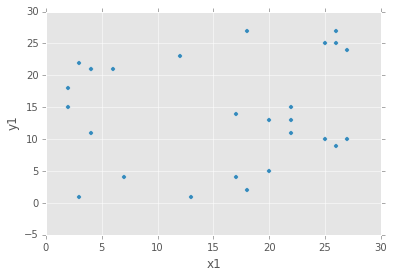

In [85]:
%matplotlib inline
matplotlib.style.use('ggplot')
df2.plot(kind='scatter', x = 'x1', y = 'y1')

In [86]:
df2.head(5)

,ICD9,PercentageOfTotalPop,PercentageDiab,x1,y1
0,272.2,0.238540,0.356932,20,5
1,401.1,0.186771,0.370291,3,22
2,401.9,0.179031,0.304885,22,15
3,V70.0,0.157419,0.133461,27,10
4,724.2,0.139425,0.211247,22,11


####Circle Packing Problem

In [90]:
circledata = df2[['x1', 'y1', 'PercentageOfTotalPop', 'PercentageDiab']].copy()

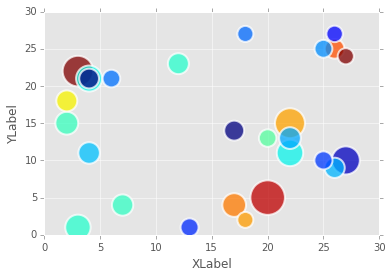

In [115]:
from pylab import *
from scipy import *

x = list(circledata['x1'])
y = list(circledata['y1'])
color = list(circledata['PercentageDiab'])
area = list(circledata['PercentageOfTotalPop']*5000)
sct = scatter(x, y, s=area, c=color, marker='o', linewidths=2, edgecolor='w')
sct.set_alpha(0.75)

axis([0,30,0,30])
xlabel('XLabel')
ylabel('YLabel')
show()

In [145]:
print final

          Bins    ICD9         Size
24        High   782.3   522.718134
1         High   401.1  1867.712103
0         High   272.2  2385.404101
17        High     401   771.009248
7   HighMedium   272.4  1120.828307
26  HighMedium  V04.81   508.644954
2   HighMedium   401.9  1790.309610
13  HighMedium   272.0   876.558102
22      Medium   268.9   614.193808
8       Medium   786.2  1041.415360
11      Medium   244.9   905.709690
6       Medium  530.81  1291.716928
12      Medium   599.0   877.563329
5    MediumLow   466.0  1354.041013
4    MediumLow   724.2  1394.250101
10   MediumLow   465.9   925.814234
14   MediumLow  780.79   817.249698
9    MediumLow   477.9   943.908323
20   MediumLow   305.1   633.293124
21   MediumLow  300.02   619.219944
25   MediumLow     477   513.671090
18         Low  780.52   655.408122
19         Low     311   645.355850
23         Low   784.0   538.801769
3          Low   V70.0  1574.185766
15         Low  300.00   791.113792
16         Low   461.9   779

In [169]:
final.values[0]

array(['High', '782.3', 522.718134298], dtype=object)

In [166]:
final.values[0][:-1]

array(['High', '782.3'], dtype=object)

In [170]:
final

,Bins,ICD9,Size
24,High,782.3,522.718134
1,High,401.1,1867.712103
0,High,272.2,2385.404101
17,High,401,771.009248
7,HighMedium,272.4,1120.828307
26,HighMedium,V04.81,508.644954
2,HighMedium,401.9,1790.309610
13,HighMedium,272.0,876.558102
22,Medium,268.9,614.193808
8,Medium,786.2,1041.415360


In [193]:
final.values[0][:-1]

array(['High', '782.3'], dtype=object)

In [187]:
final.values.shape[1]

3

In [191]:
final.values[0][1:]

array(['782.3', 522.718134298], dtype=object)

In [206]:
def fdrec(df = final):
    drec = dict()
    ncols = df.values.shape[1]
    for line in df.values:
        d = drec
        for j, col in enumerate(line):
            if not col in d.keys():
                if j == 0:
                    d[col] = {}
                    d = d[col]
                elif j == 1:
                    d['ICD9'] = col
            else:
                if j!= ncols-2:
                    d = d[col]
    return drec

In [229]:
jdata = fdrec()

In [230]:
jdata['High']

{'272.2': 2385.4041013300002,
 '401': 771.0092480899999,
 '401.1': 1867.7121029399998,
 '782.3': 522.718134298}

In [231]:
import json
jdata = json.JSONEncoder().encode(jdata)

In [233]:
os.chdir('/Users/ItelinaMa/Documents/Metis/McNulty/Visualization')
with open("medicaldata.json", "w") as outfile:
    json.dump(jdata, outfile, indent=4)

In [232]:
jdata

'{"High": {"272.2": 2385.4041013300002, "782.3": 522.718134298, "401": 771.0092480899999, "401.1": 1867.7121029399998}, "HighMedium": {"272.0": 876.5581021309999, "401.9": 1790.3096099699999, "272.4": 1120.8283072000002, "V04.81": 508.64495376}, "MediumLow": {"724.2": 1394.25010052, "300.02": 619.219943707, "477.9": 943.908323281, "780.79": 817.2496984320001, "465.9": 925.814234017, "477": 513.6710896660001, "466.0": 1354.0410132700001, "305.1": 633.2931242459999}, "Medium": {"786.2": 1041.41535987, "599.0": 877.563329312, "244.9": 905.70969039, "530.81": 1291.71692803, "268.9": 614.193807801}, "Low": {"784.0": 538.8017692000001, "300.00": 791.113791717, "311": 645.355850422, "461.9": 779.0510655410001, "780.52": 655.408122236, "V70.0": 1574.18576598}}'